In [1]:
import cv2
import numpy as np

In [2]:
from os import listdir
from os.path import isfile,join

In [3]:
mypath = 'datasets/catsvsdogs/images/'

In [4]:
files_name = [f for f in listdir(mypath) if isfile(mypath+f)]

In [5]:
files_name

['cat.0.jpg',
 'cat.1.jpg',
 'cat.10.jpg',
 'cat.100.jpg',
 'cat.1000.jpg',
 'cat.1001.jpg',
 'cat.1002.jpg',
 'cat.1003.jpg',
 'cat.1004.jpg',
 'cat.1005.jpg',
 'cat.1006.jpg',
 'cat.1007.jpg',
 'cat.1008.jpg',
 'cat.1009.jpg',
 'cat.101.jpg',
 'cat.1010.jpg',
 'cat.1011.jpg',
 'cat.1012.jpg',
 'cat.1013.jpg',
 'cat.1014.jpg',
 'cat.1015.jpg',
 'cat.1016.jpg',
 'cat.1017.jpg',
 'cat.1018.jpg',
 'cat.1019.jpg',
 'cat.102.jpg',
 'cat.1020.jpg',
 'cat.1021.jpg',
 'cat.1022.jpg',
 'cat.1023.jpg',
 'cat.1024.jpg',
 'cat.1025.jpg',
 'cat.1026.jpg',
 'cat.1027.jpg',
 'cat.1028.jpg',
 'cat.1029.jpg',
 'cat.103.jpg',
 'cat.1030.jpg',
 'cat.1031.jpg',
 'cat.1032.jpg',
 'cat.1033.jpg',
 'cat.1034.jpg',
 'cat.1035.jpg',
 'cat.1036.jpg',
 'cat.1037.jpg',
 'cat.1038.jpg',
 'cat.1039.jpg',
 'cat.104.jpg',
 'cat.1040.jpg',
 'cat.1041.jpg',
 'cat.1042.jpg',
 'cat.1043.jpg',
 'cat.1044.jpg',
 'cat.1045.jpg',
 'cat.1046.jpg',
 'cat.1047.jpg',
 'cat.1048.jpg',
 'cat.1049.jpg',
 'cat.105.jpg',
 'cat.1050.

In [6]:
train_data_dir = 'datasets/train/'

In [7]:
test_data_dir = 'datasets/test/'

In [19]:
len(test_data_dir)

14

In [8]:
from keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array

In [9]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)

In [10]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(150,150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(test_data_dir,batch_size=32,class_mode='binary',target_size=(150,150))

Found 998 images belonging to 2 classes.


In [13]:
# train_generator.save_to_dir

In [14]:
# train_generator.save_to_dir

In [52]:
train_generator.class_indices

{'cat': 0, 'dog': 1}

In [15]:
from keras.models import Sequential
from keras.layers import Dropout,Dense,Flatten
from keras.layers import MaxPooling2D,Conv2D

In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(150, 150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


# model = Sequential()

# model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape = (3,150,150) ))
# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.25))


# model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
# model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))


# model.add(Flatten())
# model.add(Dense(512,activation='relu'))
# model.add(Dense(1,activation='sigmoid'))


# model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])


print(model.summary())


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 72, 72, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)       

In [24]:
model.fit_generator(train_generator,steps_per_epoch=2000//32,epochs=30,validation_data=validation_generator,validation_steps=998//32)

Epoch 1/30
62/62 [==============================] - 31s 504ms/step - loss: 0.6839 - accuracy: 0.5747 - val_loss: 1.3189 - val_accuracy: 0.5111
Epoch 2/30
62/62 [==============================] - 34s 555ms/step - loss: 0.6693 - accuracy: 0.6250 - val_loss: 0.6102 - val_accuracy: 0.6855
Epoch 3/30
62/62 [==============================] - 34s 553ms/step - loss: 0.6552 - accuracy: 0.6524 - val_loss: 0.5841 - val_accuracy: 0.7147
Epoch 4/30
62/62 [==============================] - 34s 554ms/step - loss: 0.6332 - accuracy: 0.6601 - val_loss: 0.5732 - val_accuracy: 0.7288
Epoch 5/30
62/62 [==============================] - 34s 556ms/step - loss: 0.6064 - accuracy: 0.6845 - val_loss: 0.5225 - val_accuracy: 0.7601
Epoch 6/30
62/62 [==============================] - 34s 553ms/step - loss: 0.5886 - accuracy: 0.6961 - val_loss: 0.6616 - val_accuracy: 0.6371
Epoch 7/30
62/62 [==============================] - 35s 558ms/step - loss: 0.5777 - accuracy: 0.7063 - val_loss: 0.5063 - val_accuracy: 0.7692

In [22]:
# from keras.models import Model

In [23]:
# for i in train_generator:
#     print(i)

In [25]:
import pandas as pd

In [26]:
losses = pd.DataFrame(model.history.history)

In [27]:
losses

,loss,accuracy,val_loss,val_accuracy
0,0.683913,0.574695,1.318890,0.511089
1,0.669271,0.625000,0.610211,0.685484
2,0.655218,0.652439,0.584090,0.714718
3,0.633215,0.660061,0.573232,0.728831
4,0.606444,0.684451,0.522512,0.760081
5,0.588564,0.696138,0.661610,0.637097
6,0.577719,0.706301,0.506290,0.769153
7,0.556852,0.715955,0.473571,0.787298
8,0.534954,0.731199,0.478891,0.766129
9,0.530088,0.757622,0.450074,0.779234


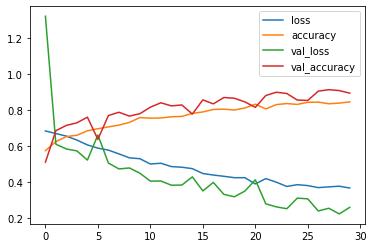

In [28]:
losses.plot()

In [31]:
predictions = model.predict_classes(validation_generator)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [32]:
predictions

array([[1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
    

In [105]:
def check(img):
    img = np.array(img)
    img = img.astype('float32')
    img/=255
    img = img.reshape(1,img.shape[0],img.shape[1],img.shape[2])
    label = model.predict_classes(img)
    return label

In [114]:
img = cv2.imread('datasets/test/cat/cat008.jpg')
cv2.imshow("label",img)
cv2.waitKey(0)
cv2.destroyAllWindows()
label =check(img)
if label==0:
    print("CAT")

else:
    print("DOG")

DOG
